<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Using-a-DataFrame" data-toc-modified-id="Using-a-DataFrame-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using a DataFrame</a></span><ul class="toc-item"><li><span><a href="#Considering-a-single-agent-stats" data-toc-modified-id="Considering-a-single-agent-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Considering a single agent stats</a></span></li><li><span><a href="#Constructing-report-dataset" data-toc-modified-id="Constructing-report-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Constructing report dataset</a></span></li><li><span><a href="#Examining-winning-agent" data-toc-modified-id="Examining-winning-agent-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Examining winning agent</a></span><ul class="toc-item"><li><span><a href="#Keeping-Informations-about-the-competing-agent" data-toc-modified-id="Keeping-Informations-about-the-competing-agent-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Keeping Informations about the competing agent</a></span></li></ul></li></ul></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Visualization</a></span></li></ul></div>

## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import operator
pd.set_option('display.max_columns', 50)
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('15-11-2019_1330_all_genius_agents_party_domain.csv',';', skiprows=1)
df.head()

,Run time (s),Round,Exception,deadline,Agreement,Discounted,#agreeing,min.util.,max.util.,Dist. to Pareto,Dist. to Nash,Social Welfare,Agent 1,Agent 2,Utility 1,Utility 2,Disc. Util. 1,Disc. Util. 2,Perceived. Util. 1,Perceived. Util. 2,User Bother 1,User Bother 2,User Util. 1,User Util. 2,Profile 1,Profile 2
0,0.035,30,NaN,60rounds,Yes,No,2,0.49465,0.97500,0.00000,0.47369,1.46965,BoulwareNegotiationParty@0,ConcederNegotiationParty@1,0.975000,0.494647,0.975000,0.494647,0.975000,0.494647,0.0,0.0,0.975000,0.494647,party1_utility.xml,party2_utility.xml
1,0.006,10,NaN,60rounds,Yes,No,2,0.65833,1.00000,0.00000,0.14542,1.65833,ConcederNegotiationParty@2,BoulwareNegotiationParty@3,0.658333,1.000000,0.658333,1.000000,0.658333,1.000000,0.0,0.0,0.658333,1.000000,party1_utility.xml,party2_utility.xml
2,0.002,3,NaN,60rounds,Yes,No,2,0.65833,1.00000,0.00000,0.14542,1.65833,SimpleAgent@4,BoulwareNegotiationParty@5,0.658333,1.000000,0.658333,1.000000,0.000000,1.000000,0.0,0.0,0.658333,1.000000,party1_utility.xml,party2_utility.xml
3,0.036,56,NaN,60rounds,Yes,No,2,0.49083,0.50455,0.43045,0.51607,0.99538,RandomCounterOfferNegotiationParty@6,BoulwareNegotiationParty@7,0.490833,0.504546,0.490833,0.504546,0.490833,0.504546,0.0,0.0,0.490833,0.504546,party1_utility.xml,party2_utility.xml
4,0.028,46,NaN,60rounds,Yes,No,2,0.56667,0.82423,0.19823,0.24198,1.39090,RandomParty@8,BoulwareNegotiationParty@9,0.566667,0.824234,0.566667,0.824234,0.566667,0.824234,0.0,0.0,0.566667,0.824234,party1_utility.xml,party2_utility.xml


In [3]:
for i in range(0, df.shape[0]):
    df['Agent 1'][i] = df['Agent 1'][i].split('@', 1)[0]
    df['Agent 2'][i] = df['Agent 2'][i].split('@', 1)[0]

df.head(7)

,Run time (s),Round,Exception,deadline,Agreement,Discounted,#agreeing,min.util.,max.util.,Dist. to Pareto,Dist. to Nash,Social Welfare,Agent 1,Agent 2,Utility 1,Utility 2,Disc. Util. 1,Disc. Util. 2,Perceived. Util. 1,Perceived. Util. 2,User Bother 1,User Bother 2,User Util. 1,User Util. 2,Profile 1,Profile 2
0,0.035,30,NaN,60rounds,Yes,No,2,0.49465,0.97500,0.00000,0.47369,1.46965,BoulwareNegotiationParty,ConcederNegotiationParty,0.975000,0.494647,0.975000,0.494647,0.975000,0.494647,0.0,0.0,0.975000,0.494647,party1_utility.xml,party2_utility.xml
1,0.006,10,NaN,60rounds,Yes,No,2,0.65833,1.00000,0.00000,0.14542,1.65833,ConcederNegotiationParty,BoulwareNegotiationParty,0.658333,1.000000,0.658333,1.000000,0.658333,1.000000,0.0,0.0,0.658333,1.000000,party1_utility.xml,party2_utility.xml
2,0.002,3,NaN,60rounds,Yes,No,2,0.65833,1.00000,0.00000,0.14542,1.65833,SimpleAgent,BoulwareNegotiationParty,0.658333,1.000000,0.658333,1.000000,0.000000,1.000000,0.0,0.0,0.658333,1.000000,party1_utility.xml,party2_utility.xml
3,0.036,56,NaN,60rounds,Yes,No,2,0.49083,0.50455,0.43045,0.51607,0.99538,RandomCounterOfferNegotiationParty,BoulwareNegotiationParty,0.490833,0.504546,0.490833,0.504546,0.490833,0.504546,0.0,0.0,0.490833,0.504546,party1_utility.xml,party2_utility.xml
4,0.028,46,NaN,60rounds,Yes,No,2,0.56667,0.82423,0.19823,0.24198,1.39090,RandomParty,BoulwareNegotiationParty,0.566667,0.824234,0.566667,0.824234,0.566667,0.824234,0.0,0.0,0.566667,0.824234,party1_utility.xml,party2_utility.xml
5,0.033,54,NaN,60rounds,Yes,No,2,0.70874,0.81833,0.06688,0.22234,1.52708,RandomParty2,BoulwareNegotiationParty,0.818333,0.708742,0.818333,0.708742,0.818333,0.708742,0.0,0.0,0.818333,0.708742,party1_utility.xml,party2_utility.xml
6,0.039,53,NaN,60rounds,Yes,No,2,0.63008,0.71500,0.17546,0.30658,1.34508,AgentF,BoulwareNegotiationParty,0.715000,0.630081,0.715000,0.630081,0.715000,0.630081,0.0,0.0,0.715000,0.630081,party1_utility.xml,party2_utility.xml


In [4]:
print(df.shape)
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)[0:3]

(12656, 26)


,percent_missing
Exception,80.783818
Run time (s),19.216182
User Util. 2,19.216182


Checking if all agents played the same amount of matches (before deleting failed tournament)

In [5]:
df['Agent 1'].value_counts()

SimpleAgent       224
ShahAgent         112
RandomDance       112
BayesianAgent     112
PNegotiator       112
                 ... 
AgentSmith2016    112
YXAgent           112
Gahboninho        112
AgentF            112
kawaii            112
Name: Agent 1, Length: 112, dtype: int64

In [6]:
df['Agent 2'].value_counts()

SimpleAgent       224
ShahAgent         112
RandomDance       112
BayesianAgent     112
PNegotiator       112
                 ... 
AgentSmith2016    112
YXAgent           112
Gahboninho        112
AgentF            112
kawaii            112
Name: Agent 2, Length: 112, dtype: int64

In [7]:
df = df.drop('Exception', axis=1).dropna()
df = df.reset_index()

Checking if all agents played the same amount of matches (after deleting failed tournament)

In [8]:
df['Agent 1'].value_counts()

SimpleAgent             204
UtilityBasedAcceptor    104
Ngent                   104
PNegotiator             103
AgentSmith2016          103
                       ... 
XianFaAgent              94
JonnyBlack               63
OptimalBidderSimple      59
FuzzyAgent               56
Rubick                    4
Name: Agent 1, Length: 102, dtype: int64

In [9]:
df['Agent 2'].value_counts()

SimpleAgent            199
kawaii                 101
ParsAgent              101
BRAMAgent2             101
AgentSmith2016         101
                      ... 
OptimalBidderSimple     63
FuzzyAgent              58
JonnyBlack              52
Rubick                   6
Aster                    1
Name: Agent 2, Length: 105, dtype: int64

## Using a DataFrame

### Considering a single agent stats

In [106]:
def single_agent_focus(agent_name):
    one = df[df['Agent 1'] == agent_name] 
    two = df[df['Agent 2'] == agent_name]
    one = one.drop(["Agent 2", "Utility 2","Disc. Util. 2", "Perceived. Util. 2",
                    "User Bother 2", "User Util. 2", "Profile 2"], axis=1)
    two = two.drop(["Agent 1", "Utility 1","Disc. Util. 1", "Perceived. Util. 1",
                    "User Bother 1", "User Util. 1", "Profile 1"], axis=1)
    two = two.rename(columns={"Agent 2" : "Agent 1", "Utility 2": "Utility 1",
                              "Disc. Util. 2": "Disc. Util. 1", "Perceived. Util. 2": "Perceived. Util. 1",
                              "User Bother 2" : "User Bother 1", "User Util. 2": "User Util. 1", 
                              "Profile 2": "Profile 1"})
    result = pd.concat([one, two])
    return result

result = single_agent_focus('Gahboninho')

percentage error = [experimental value - theoretical value] / theoretical value x 100%

In [67]:
np.mean(result['Utility 1']), np.mean(result['User Util. 1']), np.mean(result['Perceived. Util. 1'])

(0.6815722970421322, 0.6815722970421322, 0.6815722970421322)

In [70]:
(np.mean(result['Perceived. Util. 1']) - np.mean(result['Utility 1']))/np.mean(result['Utility 1'])*100

-100.0

In [104]:
(abs(result['Perceived. Util. 1'][0] - result['Utility 1'][0]))/(result['Utility 1'][0]+1e-9)*100

99.99999989999999

In [113]:
print('Percentage Error %')
result = result.reset_index(drop=True)
perc_error = []
for i in range(0, result.shape[0]):
    perc_error.append((abs(result['Perceived. Util. 1'][i] - result['Utility 1'][i]))/(result['Utility 1'][i]+1e-9)*100)

np.mean(perc_error)

Percentage Error %


50.490196027678856

percent error = [theoretical value - experimental value] / experimental value x 100%

In [114]:
print('Percent Error %')
percent_error = []
for i in range(0, result.shape[0]):
    percent_error.append((abs(result['Utility 1'][i] - 
                              result['Perceived. Util. 1'][i]))/(result['Perceived. Util. 1'][i] +1e-9)*100)
    
np.mean(percent_error)

Percent Error %


50241950844.323875

In [102]:
print(*result['Profile 1'].unique())

party1_utility.xml party2_utility.xml


In [12]:
agents = np.unique(np.append(df['Agent 1'].unique(), df['Agent 2'].unique()))

mean_nash = []
std_nash = []
mean_utility = []
std_utility = []
for i in agents:
    result = single_agent_focus(i)
    mean_nash.append(np.mean(result['Dist. to Nash']))
    std_nash.append(np.std(result['Dist. to Nash']))
    mean_utility.append(np.mean(result['Utility 1']))
    std_utility.append(np.std(result['Utility 1']))

### Constructing report dataset

In [13]:
data = {'Agents Name': agents, 'Overall Utility': np.zeros(len(agents)), 'Total Dist to Nash': np.zeros(len(agents)), 
        'Mean Utility': mean_utility, 'Std Utility': std_utility, 'Mean Nash': mean_nash, 'Std Nash': std_nash} 

final_df = pd.DataFrame(data= data)
res = []
for i in range(0, df.shape[0]):
    final_df['Overall Utility'][final_df['Agents Name'] == df['Agent 1'][i]] += df['Utility 1'][i]
    final_df['Overall Utility'][final_df['Agents Name'] == df['Agent 2'][i]] += df['Utility 2'][i]
    final_df['Total Dist to Nash'][final_df['Agents Name'] == df['Agent 1'][i]] += df['Dist. to Nash'][i]
    final_df['Total Dist to Nash'][final_df['Agents Name'] == df['Agent 2'][i]] += df['Dist. to Nash'][i]
    
final_df['Matches Win'] = np.zeros(len(agents))
final_df['N Matches'] = np.zeros(len(agents))

for i in range(0, df.shape[0]):
    if df['Utility 1'][i] > df['Utility 2'][i]:
        final_df['Matches Win'][final_df['Agents Name'] == df['Agent 1'][i]] += 1
    elif df['Utility 1'][i] < df['Utility 2'][i]:
        final_df['Matches Win'][final_df['Agents Name'] == df['Agent 2'][i]] += 1
    else:
        final_df['Matches Win'][final_df['Agents Name'] == df['Agent 1'][i]] += 0
        final_df['Matches Win'][final_df['Agents Name'] == df['Agent 2'][i]] += 0
    final_df['N Matches'][final_df['Agents Name'] == df['Agent 1'][i]] += 1
    final_df['N Matches'][final_df['Agents Name'] == df['Agent 2'][i]] += 1

    
final_df = final_df[final_df['N Matches'] > 99]
final_df = final_df[final_df['N Matches'] < 240]
final_df.sort_values(by ='Mean Nash' , ascending=True)

,Agents Name,Overall Utility,Total Dist to Nash,Mean Utility,Std Utility,Mean Nash,Std Nash,Matches Win,N Matches
90,Terra,154.381054,45.66660,0.779702,0.206723,0.230639,2.243957e-01,116.0,198.0
92,TheNegotiator,154.472732,48.19372,0.780165,0.193581,0.243403,2.154263e-01,101.0,198.0
81,SENGOKU,149.802710,49.05016,0.749014,0.190912,0.245251,2.108518e-01,79.0,200.0
47,GrandmaAgent,146.769361,50.79603,0.726581,0.182477,0.251465,2.298760e-01,53.0,202.0
74,PokerFace,153.127123,49.35438,0.781261,0.204246,0.251808,2.188477e-01,123.0,196.0
...,...,...,...,...,...,...,...,...,...
101,XianFaAgent,84.000000,155.54609,0.451613,0.497653,0.836269,4.531301e-01,84.0,186.0
64,Ngent,60.810642,168.20872,0.302541,0.391287,0.836859,4.894346e-01,37.0,201.0
56,JonnyBlack,24.374522,118.78393,0.211952,0.402438,1.032904,3.599918e-01,25.0,115.0
44,FuzzyAgent,0.000000,138.61488,0.000000,0.000000,1.215920,1.110223e-15,0.0,114.0


In [45]:
nash_df = final_df.sort_values(by ='Mean Nash' , ascending=True)
nash_df = nash_df.reset_index(drop=True)
nash_df[nash_df['Agents Name'] == 'Atlas']

,Agents Name,Overall Utility,Total Dist to Nash,Mean Utility,Std Utility,Mean Nash,Std Nash,Matches Win,N Matches
78,Atlas,32.69686,63.49998,0.326969,0.092782,0.635,0.091595,1.0,100.0


In [29]:
final_df['Mean Nash'][final_df['Agents Name'] == 'Atlas']

26    0.635
Name: Mean Nash, dtype: float64

In [24]:
final_df.sort_values(by ='Overall Utility' , ascending=False)[:1]['Agents Name'].values

array(['DoNA'], dtype=object)

In [36]:
utility_df = final_df.sort_values(by ='Mean Utility' , ascending=False)
utility_df

,Agents Name,Overall Utility,Total Dist to Nash,Mean Utility,Std Utility,Mean Nash,Std Nash,Matches Win,N Matches
74,PokerFace,153.127123,49.35438,0.781261,0.204246,0.251808,2.188477e-01,123.0,196.0
92,TheNegotiator,154.472732,48.19372,0.780165,0.193581,0.243403,2.154263e-01,101.0,198.0
90,Terra,154.381054,45.66660,0.779702,0.206723,0.230639,2.243957e-01,116.0,198.0
33,BraveCat,152.933796,51.09802,0.772393,0.218061,0.258071,2.139715e-01,108.0,198.0
65,NiceTitForTat,155.570715,57.97566,0.770152,0.229290,0.287008,2.728343e-01,122.0,202.0
...,...,...,...,...,...,...,...,...,...
26,Atlas,32.696860,63.49998,0.326969,0.092782,0.635000,9.159537e-02,1.0,100.0
64,Ngent,60.810642,168.20872,0.302541,0.391287,0.836859,4.894346e-01,37.0,201.0
56,JonnyBlack,24.374522,118.78393,0.211952,0.402438,1.032904,3.599918e-01,25.0,115.0
68,OptimalBidderSimple,0.000000,148.34224,0.000000,0.000000,1.215920,2.220446e-16,0.0,122.0


In [44]:
utility_df = utility_df.reset_index(drop=True)
utility_df[utility_df['Agents Name'] == 'Atlas']

,Agents Name,Overall Utility,Total Dist to Nash,Mean Utility,Std Utility,Mean Nash,Std Nash,Matches Win,N Matches
97,Atlas,32.69686,63.49998,0.326969,0.092782,0.635,0.091595,1.0,100.0


### Examining winning agent

#### Keeping Informations about the competing agent

In [15]:
def agent_focus(agent_name):
    one = df[df['Agent 1'] == agent_name] 
    two = df[df['Agent 2'] == agent_name]
    result = pd.concat([one, two])
    return result

result = agent_focus('Atlas32016')

In [16]:
result.Agreement.value_counts()

Yes    196
No       6
Name: Agreement, dtype: int64

In [17]:
np.mean(result['Dist. to Nash'])

0.27629514851485143

## Data Visualization

In [18]:
def nash_plot(name, distance, version):
    score = {}
    for i in range(0, df.shape[0]):
        if df['Agent 1'][i] == str(name):
            try:
                score[df['Agent 2'][i]].append(df[distance][i])
            except KeyError:
                score[df['Agent 2'][i]] = []
                score[df['Agent 2'][i]].append(df[distance][i])
        elif df['Agent 2'][i] == str(name):
            try:
                score[df['Agent 1'][i]].append(df[distance][i])
            except KeyError:
                score[df['Agent 1'][i]] = []
                score[df['Agent 1'][i]].append(df[distance][i])

    plot_opp = []
    plot_dist = []
    for i in score.keys():
        plot_opp.append(i)
        plot_dist.append(np.mean(score[i]))

    figure(num=None, figsize=(5, 3.33), dpi=300, facecolor='w', edgecolor='k')
    plt.title(
        distance + " for " + str(name) + " (Mean :" + str(np.mean([x for x in plot_dist if str(x) != 'nan'])) + ")",
        fontsize=20)
    plt.ylim(0, 2)
    plt.xticks(fontsize=16, rotation=90)
    plt.yticks(fontsize=16)
    if version == 1:
        plt.bar(plot_opp, plot_dist)
    else:
        plt.plot(plot_opp, plot_dist)
    plt.ylabel("Average Distance to Nash", fontsize=20)
    plt.xlabel("Opponents",fontsize=20)
    plt.savefig(name + distance, dpi = 300)
    plt.show()

In [19]:
def utility_plot(name):
    score = {}
    for i in range(0, df.shape[0]):
        if df['Agent 1'][i] == str(name):
            try:
                score[df['Agent 2'][i]].append(df['Utility 1'][i])
            except KeyError:
                score[df['Agent 2'][i]] = []
                score[df['Agent 2'][i]].append(df['Utility 1'][i])
        elif df['Agent 2'][i] == str(name):
            try:
                score[df['Agent 1'][i]].append(df['Utility 2'][i])
            except KeyError:
                score[df['Agent 1'][i]] = []
                score[df['Agent 1'][i]].append(df['Utility 2'][i])

    plot_opp = []
    plot_dist = []
    for i in score.keys():
        plot_opp.append(i)
        plot_dist.append(np.mean(score[i]))

    figure(num=None, figsize=(5, 3.33), dpi=300, facecolor='w', edgecolor='k')
    plt.title(
        "Utility for " + str(name) + " (Mean :" + str(np.mean([x for x in plot_dist if str(x) != 'nan'])) + ")",
        fontsize=20)
    plt.ylim(0, 1)
    plt.xticks(fontsize=16, rotation=90)
    plt.yticks(fontsize=16)
    plt.bar(plot_opp, plot_dist)
    plt.ylabel("Average Agent Utility", fontsize=20)
    plt.xlabel("Opponents",fontsize=20)
    plt.savefig(name, dpi = 300)
    plt.show()

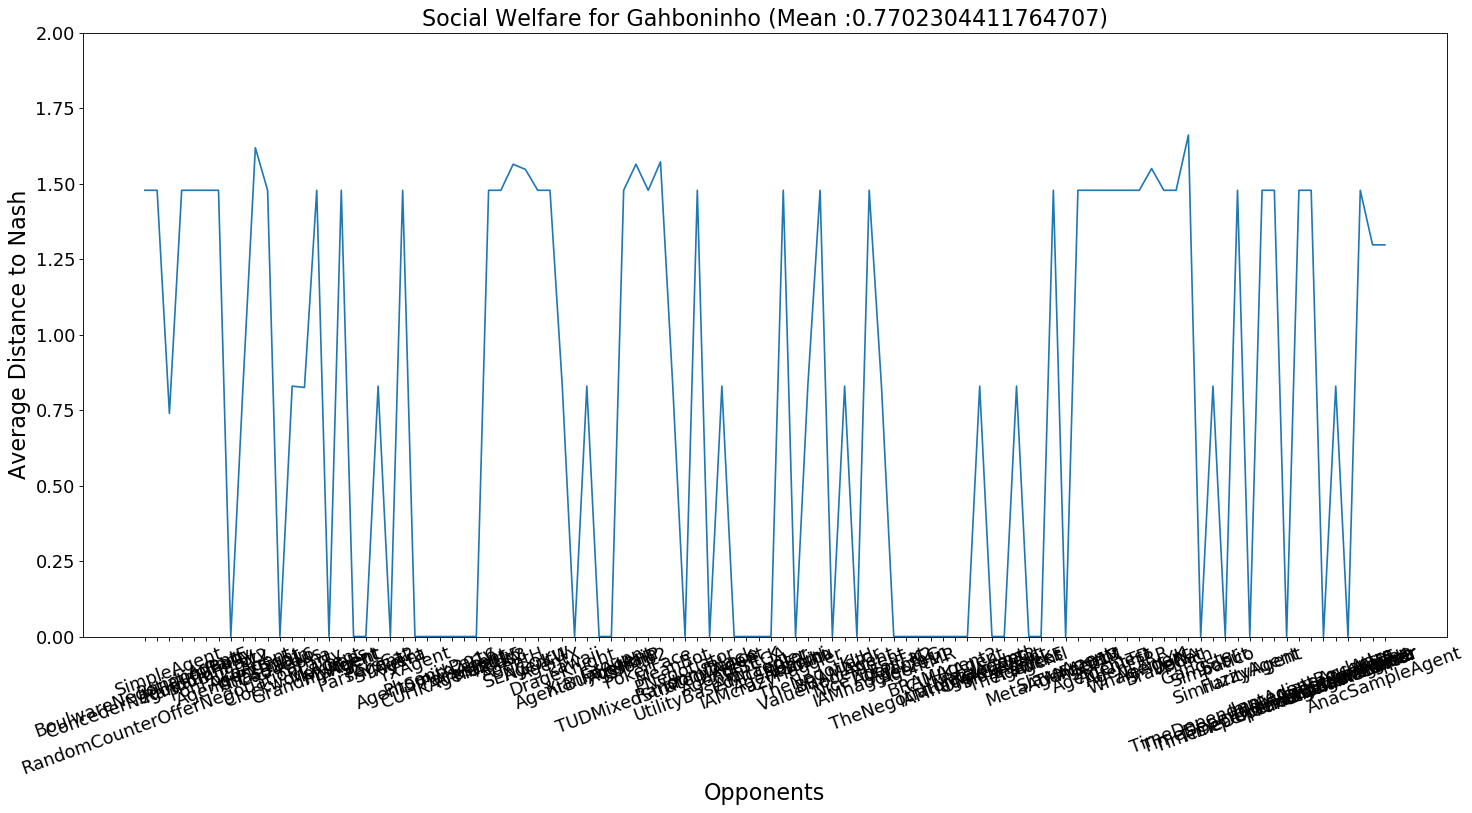

In [20]:
nash_plot('Gahboninho', 'Social Welfare', 0)

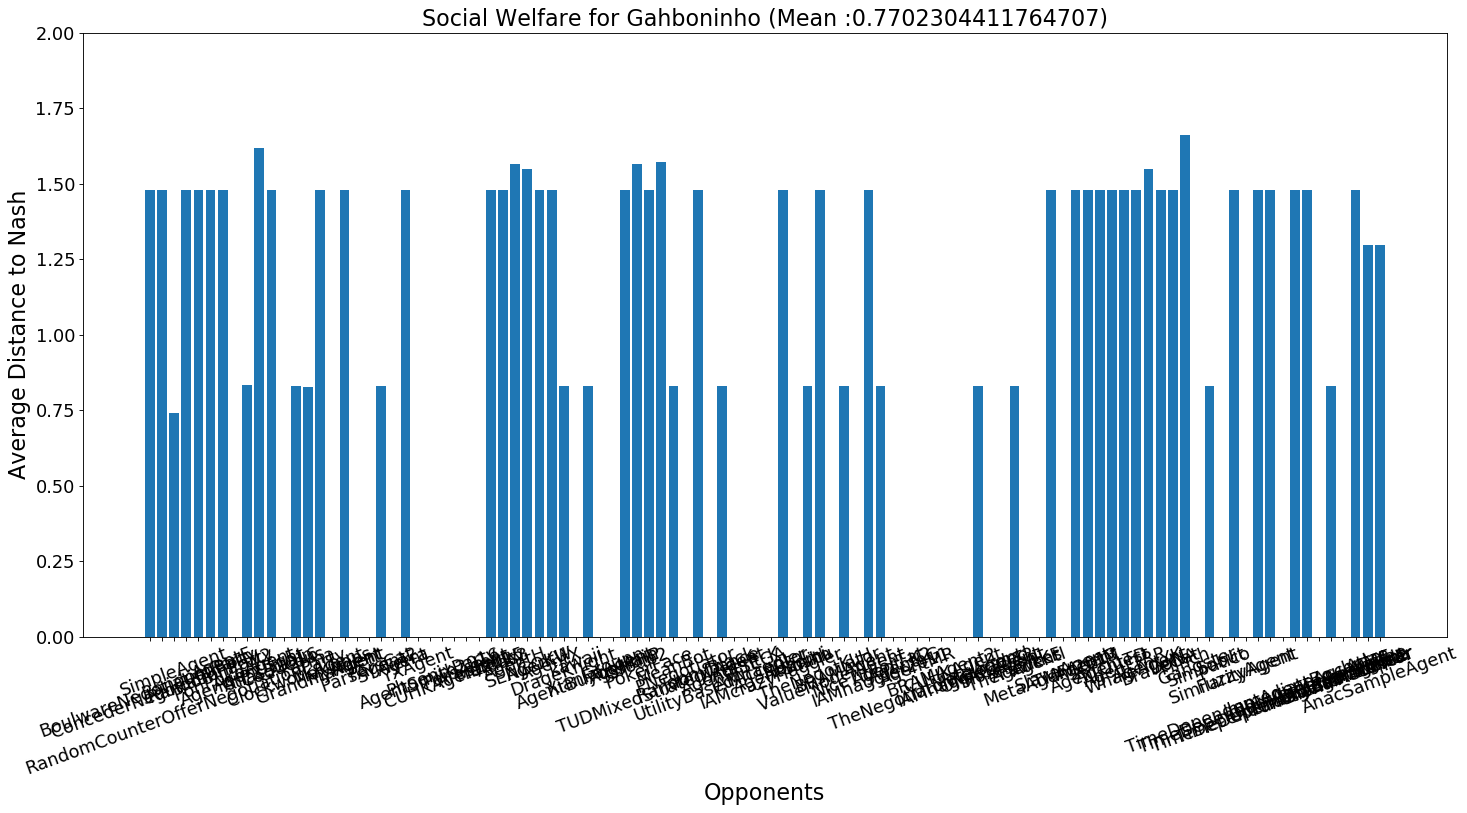

In [21]:
nash_plot('Gahboninho', 'Social Welfare', 1)

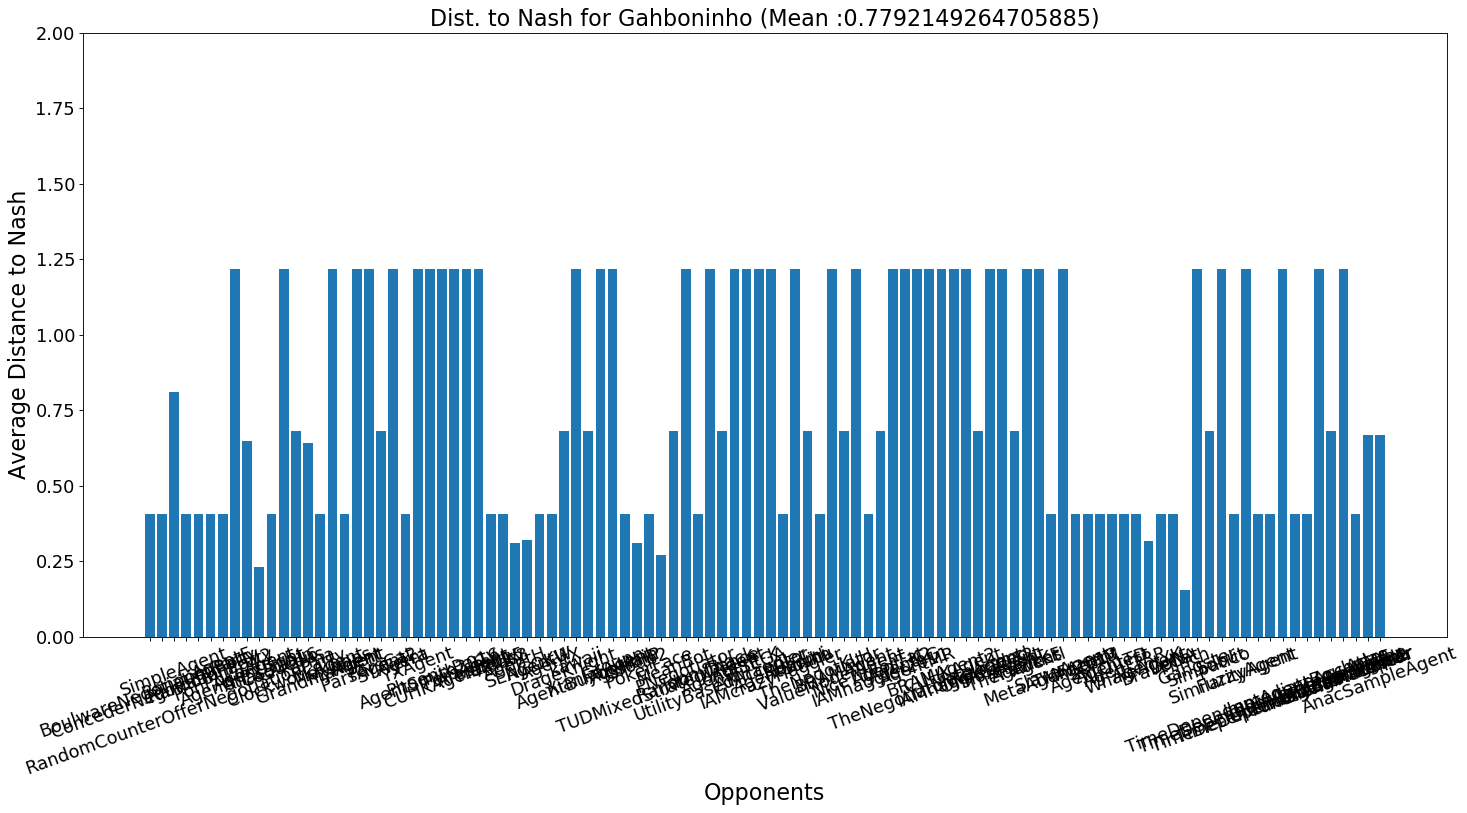

In [27]:
nash_plot('Gahboninho', 'Dist. to Nash', 1)

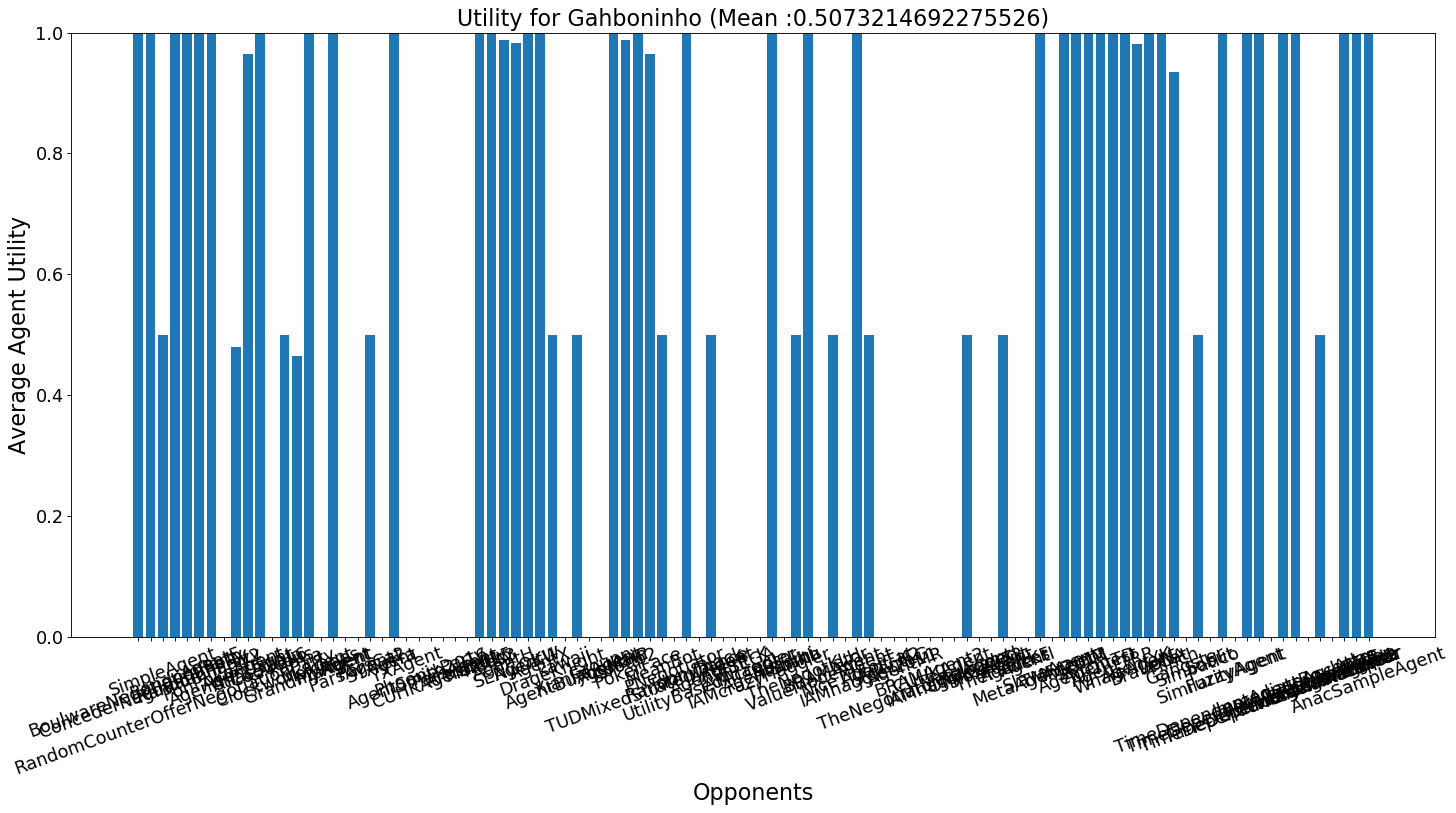

In [23]:
utility_plot('Gahboninho')